In [1]:
from dynamics_functions import *
from plots import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [18]:
def single_plot(a, b, c, sigma, beta, N=100, T=1000, p0=None):
    """
    Run a single associative learning experiment and plot task accuracy over time.

    Params
    ------
    a : float
        Parameter controlling influence of new data samples.
    b : float
        Parameter controlling allowed distribution volatility.
    c : float
        Parameter controlling expected mutual information.
    sigma : float
        Controls volatility of true distribution. Higher sigma
        means less volatile.
    beta : float
        Controls uncertainty in true distribution. Higher beta implies
        less uncertainty (more biased towards 0 or 1)
    N : int
        Size of the grid on each side
    T : float
        Time to run integration
    p0 : np array (N x N x 2) or None
        Initial distribution, if None then initialize with the uniform
        distribution.
    """
    T = int(T)
    # Generate true distribution
    truth = gen_dist_cond(sigma, beta, N=N)
    # Generate 2*T samples from the ground truth
    samples = gen_samples_cond(2*T,truth)

    # Get results
    t,ps,msg = get_dist(samples, a, b, c, p0=p0, N=N, T=T)

    # probability of correct classification over time
    accuracy = (truth*ps).sum(axis=-1).mean(axis=(1,2))
    # train accuracy
    train_acc = []
    for sample in samples[:T]:
        train_acc.append(ps[:,sample[0],sample[1],sample[2]])
    train_acc = np.mean(train_acc, axis=0)
        

    fig = plt.figure(constrained_layout=True, figsize=(2.9,1.7))
    axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})
    ax_res = axs['Left']
    ax_res.plot(t, accuracy, 'r')
    ax_res.plot(t, train_acc, 'b')
    ax_res.set_ylim(top=1.0)
    ax_res.set_xlabel('Time')
    ax_res.set_ylabel('Accuracy')

    axs['TopRight'].imshow(truth[:,:,1], cmap='coolwarm',vmin=0, vmax=1, origin='lower')
    axs['TopRight'].annotate("$P^{*}(1|x)$", (-0.05,-0.3), xycoords='axes fraction')
    axs['TopRight'].set_xticks([])
    axs['TopRight'].set_yticks([])

    axs['BottomRight'].imshow(ps[-1,:,:,1], cmap='coolwarm',vmin=0, vmax=1, origin='lower')
    axs['BottomRight'].annotate(r"$\hat P_{T}(1|x)$", (-0.05,-0.3), xycoords='axes fraction')
    axs['BottomRight'].set_xticks([])
    axs['BottomRight'].set_yticks([])
    
    plt.show()
    return ps

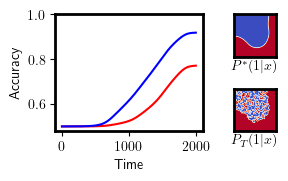

In [26]:
ps = single_plot(a=.001, b=0.00001, c=0.01, sigma=20, beta=50, N=100, T=2000, p0=None)